## Download annual aggregate results for individual buildings
This tutorial will walk through how to find and download annual results for a building type in one state from the ResStock 2025 Release 1 dataset. This tutorial is inspired by and takes sections from the [ComStock tutorial](https://natlabrockies.github.io/ComStock.github.io/docs/resources/how_to_guides/example_scripts.html) for accessing datasets programmatically.

Before starting this tutorial, look at the [Data page]({{ site.baseurl }}{% link docs/data.html %}) which has important notes about how each ResStock dataset is formatted and organized. To complete this tutorial, you will need to install the following Python libraries: pandas and matplotlib.

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Choose the ResStock dataset

This tutorial pulls from the [ResStock 2025 Release 1 AMY2018 dataset](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=nrel-pds-building-stock%2Fend-use-load-profiles-for-us-building-stock%2F2025%2Fresstock_amy2018_release_1%2F&limit=50) and compares annual baseline data to annual data for upgrade 09, a heat pump water heater. We will compare results for the state of Colorado in single-family attached buildings. To see a full list of upgrade options available and a short description of each, refer to this dataset's [README](https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/README_resstock_20251.pdf).

Navigate to the correct files for this ResStock release on [OEDI](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=nrel-pds-building-stock%2Fend-use-load-profiles-for-us-building-stock%2F2025%2Fresstock_amy2018_release_1%2F), and store the links in the two URI placeholders below. The files for this example can be found under 'metadata_and_annual_results/ > by_state/ > full/ > csv/ > state=CO/ > CO_upgradeXX.csv.gz', where XX is the number representing the upgrade.

In [ ]:
# Baseline annual results file for Colorado. No need to unzip the file.
baseline_uri = "https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/metadata_and_annual_results/by_state/full/csv/state=CO/CO_upgrade0.csv.gz"

# Upgrade 09 annual results file for Colorado. No need to unzip the file.
upgrade_uri = "https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/metadata_and_annual_results/by_state/full/csv/state=CO/CO_upgrade9.csv.gz"

# Store the uri links
baseline = pd.read_csv(
    baseline_uri,
    low_memory=False  # Use more memory for better type inference
)

upgrade = pd.read_csv(
    upgrade_uri,
    low_memory=False # Use more memory for better type inference
)

# If the results file was a parquet file instead of a csv file, uncomment out the next line and use a similar formatting instead to store the URI link.
#baseline = pd.read_parquet(baseline_uri)

,CO_upgrade9.csv,completed_status,upgrade,in.upgrade_name,weight,applicability,in.sqft..ft2,in.representative_income,in.county_name,in.ahs_region,...,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_low_ng_price_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_low_ng_price_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_high_ng_price_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_high_ng_price_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_mid_case_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_mid_case_25..co2e_mmt
0,34.0,Success,9.0,Heat Pump Water Heater,253.903673,True,3310.0,74605.0,Jefferson County,Non-CBSA Mountain,...,-0.000034,-0.000031,-0.000032,-0.000028,-0.000026,-0.000023,-0.000023,-0.000020,-0.000024,-0.000021
1,52.0,Success,9.0,Heat Pump Water Heater,253.903673,True,854.0,36204.0,Arapahoe County,Non-CBSA Mountain,...,-0.000023,-0.000021,-0.000021,-0.000019,-0.000017,-0.000015,-0.000015,-0.000013,-0.000016,-0.000014
2,131.0,Success,9.0,Heat Pump Water Heater,253.903673,True,322.0,14131.0,Logan County,Non-CBSA Mountain,...,0.000013,0.000012,0.000012,0.000011,0.000009,0.000008,0.000008,0.000007,0.000008,0.000007
3,185.0,Success,9.0,Heat Pump Water Heater,253.903673,True,1138.0,42184.0,Larimer County,Non-CBSA Mountain,...,-0.000152,-0.000139,-0.000143,-0.000126,-0.000117,-0.000102,-0.000101,-0.000089,-0.000105,-0.000095
4,199.0,Success,9.0,Heat Pump Water Heater,253.903673,True,1698.0,142340.0,Douglas County,Non-CBSA Mountain,...,-0.000033,-0.000030,-0.000030,-0.000027,-0.000026,-0.000023,-0.000023,-0.000020,-0.000023,-0.000021


In [ ]:
# Look at the baseline data.
baseline.head()

In [ ]:
# Look at the upgrade data.
upgrade.head()

### Specify the location and building characteristics of interest

In this example, we are looking for single-family attached dwelling units only. You can change the filtering logic with many characteristics. Look at the ['data_dictionary.tsv'](https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/data_dictionary.tsv) for column names and definitions. We will use the 'in.geometry_building_type_recs' column to filter. Convert the column values to a 'category' data type for faster filtering than traditional boolean indexing. This is a useful step for larger datasets, but not necessary.

In [ ]:
# Convert the column in each data file to a category. The column is originally an object data type.
baseline['in.geometry_building_type_recs'] = baseline['in.geometry_building_type_recs'].astype('category')
upgrade['in.geometry_building_type_recs'] = upgrade['in.geometry_building_type_recs'].astype('category')


# Filter the baseline and annual results files for single-family attached samples only.
filtered_baseline = baseline[baseline['in.geometry_building_type_recs'] == 'Single-Family Attached']
filtered_upgrade = upgrade[upgrade['in.geometry_building_type_recs'] == 'Single-Family Attached']

,CO_upgrade9.csv,completed_status,upgrade,in.upgrade_name,weight,applicability,in.sqft..ft2,in.representative_income,in.county_name,in.ahs_region,...,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_low_ng_price_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_high_re_cost_low_ng_price_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_high_ng_price_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_low_re_cost_high_ng_price_25..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_mid_case_15..co2e_mmt,calc.weighted.emissions_reduction.electricity.lrmer_mid_case_25..co2e_mmt
7,306.0,Success,9.0,Heat Pump Water Heater,253.903673,True,7414.0,83236.0,Jefferson County,Non-CBSA Mountain,...,0.000033,0.000026,0.000028,0.000022,0.000014,0.000013,0.000008,0.000008,0.000013,0.000011
10,436.0,Success,9.0,Heat Pump Water Heater,253.903673,True,1207.0,NaN,Eagle County,Non-CBSA Mountain,...,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
56,3136.0,Success,9.0,Heat Pump Water Heater,253.903673,True,1207.0,73823.0,El Paso County,Non-CBSA Mountain,...,0.000056,0.000049,0.000052,0.000044,0.000037,0.000033,0.000030,0.000027,0.000033,0.000030
62,3490.0,Success,9.0,Heat Pump Water Heater,253.903673,True,1207.0,52836.0,Denver County,Non-CBSA Mountain,...,-0.000018,-0.000016,-0.000017,-0.000015,-0.000014,-0.000012,-0.000013,-0.000011,-0.000013,-0.000012
91,4929.0,Success,9.0,Heat Pump Water Heater,253.903673,True,872.0,NaN,Pitkin County,Non-CBSA Mountain,...,-0.000023,-0.000022,-0.000022,-0.000019,-0.000018,-0.000016,-0.000016,-0.000014,-0.000016,-0.000015


In [ ]:
# Look at the filtered data
filtered_baseline.head()


In [ ]:
# Look at the filtered data
filtered_upgrade.head()

### Plot total site energy consumption between baseline and upgrade. Then, save the data.

In this example, we are plotting all single-family attached dwelling units for the baseline and upgrade 09, even if they did not get the upgrade 09 applied. We will look at energy savings based on the type of water heater that was originally in the dwelling unit using column 'in.water_heater_efficiency'. The site energy column to analyze is 'calc.weighted.site_energy.net.energy_consumption..tbtu'. Column names with 'calc' in them already have the dataset weighting factor multiplied in.

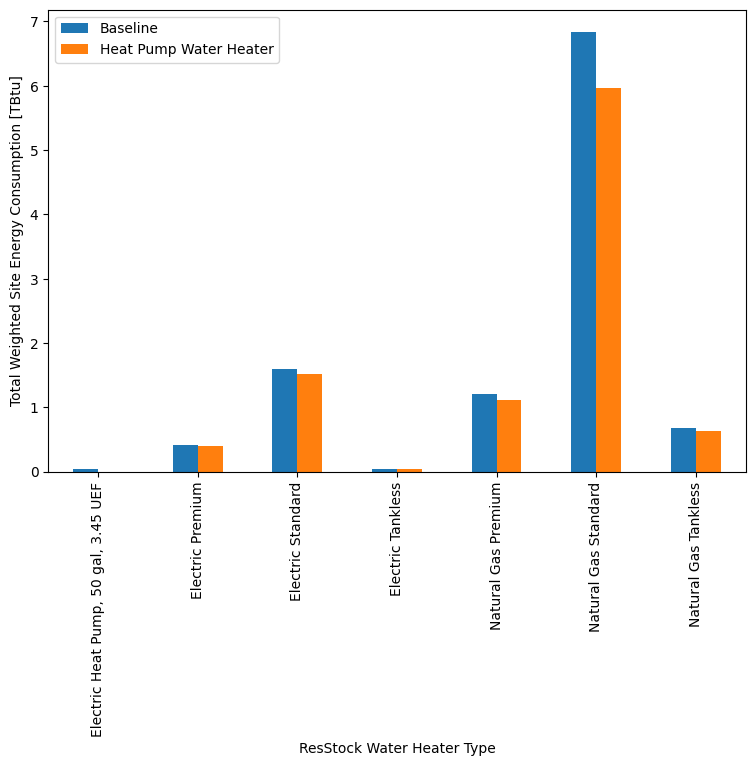

In [ ]:
# Identify the field we are interested in plotting.
field = 'calc.weighted.site_energy.net.energy_consumption..tbtu'

# Category of interest.
category = 'in.water_heater_efficiency'

# Plot total baseline vs upgrade energy consumption by original water heater type in single-family attached dwelling units
# Cycle through the water heater types
baseline_annual_consumption = filtered_baseline.groupby(category)[field].sum()
upgrade_annual_consumption = filtered_upgrade.groupby(category)[field].sum()

# Combine into a single dataframe.
data = pd.concat([baseline_annual_consumption, upgrade_annual_consumption], axis=1)
data.columns = ['Baseline', 'Heat Pump Water Heater']

# Save and plot data.
data.to_csv(f'baseline_and_upgrade9_by_whtype_resstock_2025_1.csv')

ax = data.plot.bar(rot=0, figsize=(9,6))
ax.set_xlabel('ResStock Water Heater Type')
ax.set_ylabel('Total Weighted Site Energy Consumption [TBtu]')
plt.xticks(rotation=90)
plt.show()